In [2]:
import time
import numpy as np 
import pandas as pd
import os
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
np.random.seed(42)
tf.random.set_seed(42)

In [3]:
pwd

'/Users/kushalmareedu/SIGN BOARD CLASSIFICATION'

In [4]:
start = time.time()
image_data = []
image_labels = []
total_classes = 43
height = 32
width = 32
channels = 3
input_path = '/Users/kushalmareedu/SIGN BOARD CLASSIFICATION/'

for i in range(total_classes):
    path = input_path + 'Train//' + str(i)
    print(path)
    images = os.listdir(path)

    for img in images:
        try:
            image = cv2.imread(path + '//' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((height, width))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except:
            print("Error - Image loading")

#Converting lists into numpy arrays
image_data = np.array(image_data)
image_labels = np.array(image_labels)

print(image_data.shape, image_labels.shape)
end = time.time()
print("It has taken", round(end-start,5), "seconds")

/Users/kushalmareedu/SIGN BOARD CLASSIFICATION/Train//0
/Users/kushalmareedu/SIGN BOARD CLASSIFICATION/Train//1
/Users/kushalmareedu/SIGN BOARD CLASSIFICATION/Train//2
/Users/kushalmareedu/SIGN BOARD CLASSIFICATION/Train//3
/Users/kushalmareedu/SIGN BOARD CLASSIFICATION/Train//4
/Users/kushalmareedu/SIGN BOARD CLASSIFICATION/Train//5
/Users/kushalmareedu/SIGN BOARD CLASSIFICATION/Train//6
/Users/kushalmareedu/SIGN BOARD CLASSIFICATION/Train//7
/Users/kushalmareedu/SIGN BOARD CLASSIFICATION/Train//8
/Users/kushalmareedu/SIGN BOARD CLASSIFICATION/Train//9
/Users/kushalmareedu/SIGN BOARD CLASSIFICATION/Train//10
/Users/kushalmareedu/SIGN BOARD CLASSIFICATION/Train//11
/Users/kushalmareedu/SIGN BOARD CLASSIFICATION/Train//12
/Users/kushalmareedu/SIGN BOARD CLASSIFICATION/Train//13
/Users/kushalmareedu/SIGN BOARD CLASSIFICATION/Train//14
/Users/kushalmareedu/SIGN BOARD CLASSIFICATION/Train//15
/Users/kushalmareedu/SIGN BOARD CLASSIFICATION/Train//16
/Users/kushalmareedu/SIGN BOARD CLASSIFIC

In [5]:
#shuffling data
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

In [6]:
#Splitting training and testing dataset
X_train, X_valid, y_train, y_valid = train_test_split(image_data, image_labels, test_size=0.2, random_state=42, shuffle=True)

X_train = X_train/255 
X_valid = X_valid/255

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_valid.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_valid.shape)

X_train.shape (31367, 32, 32, 3)
X_valid.shape (7842, 32, 32, 3)
y_train.shape (31367,)
y_valid.shape (7842,)


In [7]:
#Converting the labels into one hot encoding
y_train = keras.utils.to_categorical(y_train, total_classes)
y_valid = keras.utils.to_categorical(y_valid, total_classes)

print(y_train.shape)
print(y_valid.shape)

(31367, 43)
(7842, 43)


In [8]:
keras.backend.clear_session() # clearing session
np.random.seed(42) # generating random seed
tf.random.set_seed(42) # set.seed function helps reuse same set of random variables

In [9]:
model = keras.models.Sequential([    keras.layers.Conv2D(filters=16, kernel_size=(5,5), activation='relu', input_shape=(height,width,channels)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.Dropout(rate=0.25),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.Dropout(rate=0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(43, activation='softmax')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        1216      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 128)         73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 128)         0

In [11]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
epochs = 11
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs,
validation_data=(X_valid, y_valid))

Epoch 1/11
981/981 [==============================] - 39s 39ms/step - loss: 1.6254 - accuracy: 0.5606 - val_loss: 0.0631 - val_accuracy: 0.9821
Epoch 2/11
981/981 [==============================] - 38s 39ms/step - loss: 0.1438 - accuracy: 0.9547 - val_loss: 0.0428 - val_accuracy: 0.9887
Epoch 3/11
981/981 [==============================] - 38s 39ms/step - loss: 0.0855 - accuracy: 0.9757 - val_loss: 0.0306 - val_accuracy: 0.9920
Epoch 4/11
981/981 [==============================] - 39s 39ms/step - loss: 0.0602 - accuracy: 0.9817 - val_loss: 0.0309 - val_accuracy: 0.9922
Epoch 5/11
981/981 [==============================] - 38s 39ms/step - loss: 0.0504 - accuracy: 0.9839 - val_loss: 0.0339 - val_accuracy: 0.9906
Epoch 6/11
981/981 [==============================] - 38s 39ms/step - loss: 0.0457 - accuracy: 0.9857 - val_loss: 0.0153 - val_accuracy: 0.9957
Epoch 7/11
981/981 [==============================] - 38s 39ms/step - loss: 0.0310 - accuracy: 0.9897 - val_loss: 0.0166 - val_accuracy:

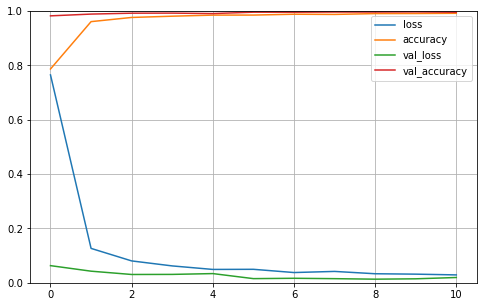

In [13]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # setting limits for y-axis
plt.show()

In [20]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score
start = time.time()
test = pd.read_csv(input_path + '//Test.csv')

labels = test["ClassId"].values
test_imgs = test["Path"].values

In [21]:
#dictionary to label all traffic signs class.
classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)', 
            3:'Speed limit (50km/h)', 
            4:'Speed limit (60km/h)', 
            5:'Speed limit (70km/h)', 
            6:'Speed limit (80km/h)', 
            7:'End of speed limit (80km/h)', 
            8:'Speed limit (100km/h)', 
            9:'Speed limit (120km/h)', 
            10:'No passing', 
            11:'No passing veh over 3.5 tons', 
            12:'Right-of-way at intersection', 
            13:'Priority road', 
            14:'Yield', 
            15:'Stop', 
            16:'No vehicles', 
            17:'Veh > 3.5 tons prohibited', 
            18:'No entry', 
            19:'General caution', 
            20:'Dangerous curve left', 
            21:'Dangerous curve right', 
            22:'Double curve', 
            23:'Bumpy road', 
            24:'Slippery road', 
            25:'Road narrows on the right', 
            26:'Road work', 
            27:'Traffic signals', 
            28:'Pedestrians', 
            29:'Children crossing', 
            30:'Bicycles crossing', 
            31:'Beware of ice/snow',
            32:'Wild animals crossing', 
            33:'End speed + passing limits', 
            34:'Turn right ahead', 
            35:'Turn left ahead', 
            36:'Ahead only', 
            37:'Go straight or right', 
            38:'Go straight or left', 
            39:'Keep right', 
            40:'Keep left', 
            41:'Roundabout mandatory', 
            42:'End of no passing', 
            43:'End no passing veh > 3.5 tons' }

(1, 32, 32, 3)


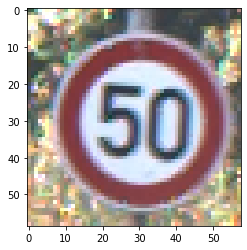

In [41]:
image = Image.open('/Users/kushalmareedu/SIGN BOARD CLASSIFICATION/' + test_imgs[34])
img = image.resize((height,width))
img = np.array(img)/255.
img = img.reshape(1,height,width,channels)
print(img.shape)
plt.imshow(image)

In [42]:
pred = model.predict_classes(img)[0]
print(pred+1)
sign = classes[pred+1]
print(sign)

3
Speed limit (50km/h)


In [25]:
start = time.time()
test = pd.read_csv(input_path + 'Test.csv')

labels = test["ClassId"].values
imgs = test["Path"].values

data =[]

for img in imgs:
    #test_imgs.append(img_path)
    try:
        image = cv2.imread(input_path + img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((height, width))
        data.append(np.array(resize_image))
    except:
        print("Error")
X_test = np.array(data)
X_test = X_test/255

pred = model.predict_classes(X_test)

#Accuracy with the test data
print(accuracy_score(labels, pred))
end = time.time()
print("It has taken", round(end-start,5), "seconds")

0.9677751385589866
It has taken 6.49973 seconds


In [19]:
start = time.time()
test = pd.read_csv(input_path + 'Test.csv')

labels = test["ClassId"].values
imgs = test["Path"].values

data =[]

for img in imgs:
    #test_imgs.append(img_path)
    try:
        image = cv2.imread(input_path + img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((height, width))
        data.append(np.array(resize_image))
    except:
        print("Error")
X_test = np.array(data)
X_test = X_test/255

pred = model.predict_classes(X_test)
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
accuracy = accuracy_score(labels, pred)
print('Accuracy: %0.2f' % accuracy)
precision = precision_score(labels, pred, average="weighted")
print('Precision: %0.2f' % precision)
recall = recall_score(labels, pred, average="weighted")
print('Recall: %0.2f' % recall)
f1 = f1_score(labels, pred, average="weighted")
print('F1 score: %0.2f' % f1)

Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1 score: 0.97
